In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# FASE 1: FLUJO LIMPIEZA Y TRANSFORMACIÓN DE DATOS

# Pasos:
# Lectura de Datos
# Exploración inicial y estructura de los datos
# Identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes
# Transformación de tipo de datos y estandarización de nombre de variables
# Estadísticas básicas variables numéricas y frecuencias variables categóricas
# Limpieza y transformación dependiendo de lo anterior
# Identificación y gestión de nulos
# Unir los 2 data frames de la forma más eficiente
# Identificación y gestión de duplicados

# FASE 1

##### Lectura de Datos y exploración inicial

## DF: Customer_Flight_Activity

In [75]:
df_Flight_Activity = pd.read_csv('Customer_Flight_Activity.csv') 
df_Flight_Activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_Flight_Activity.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [5]:
df_Flight_Activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
164658,765428,2017,10,4,2,6,3216,321.0,0,0
351089,793608,2018,9,11,0,11,869,86.0,0,0
176799,514900,2017,11,0,0,0,0,0.0,0,0
173288,329300,2017,11,9,0,9,1377,137.0,0,0
184193,908120,2017,11,0,0,0,0,0.0,0,0


In [76]:
def exploracion_inicial(df_Flight_Activity):
   
    print("Exploración inicial de Customer Flight Activity")
    print(f"Tamaño del DataFrame: {df_Flight_Activity.shape[0]} filas y {df_Flight_Activity.shape[1]} columnas")

    print("\nNombres de las columnas:")
    print(df_Flight_Activity.columns.tolist())

    print("\nTipos de datos por columna:")
    print(df_Flight_Activity.dtypes)

    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_Flight_Activity.describe(include="all").T)

    print("\nCantidad de valores únicos por columna:")
    print(df_Flight_Activity.nunique())

    # Verificar si hay valores negativos en cualquier columna numérica
    columnas_numericas = df_Flight_Activity.select_dtypes(include=["int64", "float64"]).columns
    valores_negativos = (df_Flight_Activity[columnas_numericas] < 0).sum()

    print("\nValores negativos por columna:")
    print(valores_negativos)

exploracion_inicial(df_Flight_Activity)

Exploración inicial de Customer Flight Activity
Tamaño del DataFrame: 405624 filas y 10 columnas

Nombres de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']

Tipos de datos por columna:
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

Estadísticas descriptivas de columnas numéricas:
                                count           mean            std       min  \
Loyalty Number               405624.0  550037.873084  258935.286969  100018.0   
Year                         405624.0    2017.5000

##### Lectura de Datos y exploración inicial

## DF: Customer_Loyalty_History

In [88]:
df_Loyalty_History = pd.read_csv('Customer_Loyalty_History.csv') 
df_Loyalty_History.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [12]:
df_Loyalty_History.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8105,945703,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,101123.0,Married,Aurora,9840.08,2018 Promotion,2018,4,NaN,NaN
8549,140769,Canada,Ontario,Trenton,K8V 4B2,Female,Master,88418.0,Divorced,Nova,9414.94,Standard,2018,12,NaN,NaN
747,252341,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,52779.0,Married,Aurora,4967.54,Standard,2013,5,NaN,NaN
15475,713831,Canada,Prince Edward Island,Charlottetown,C1A 6E8,Female,College,NaN,Divorced,Star,9435.54,Standard,2013,1,NaN,NaN
7525,743335,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Nova,7212.52,Standard,2018,9,NaN,NaN


In [13]:
df_Loyalty_History.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [89]:
def exploracion_inicial(df_Loyalty_History):
   
    print("Exploración inicial de Customer Loyalty History")
    print(f"Tamaño del DataFrame: {df_Loyalty_History.shape[0]} filas y {df_Loyalty_History.shape[1]} columnas")

    print("\nNombres de las columnas:")
    print(df_Loyalty_History.columns.tolist())

    print("\nTipos de datos por columna:")
    print(df_Loyalty_History.dtypes)

    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_Loyalty_History.describe(include="all").T)

    print("\nCantidad de valores únicos por columna:")
    print(df_Loyalty_History.nunique())

    # Verificar si hay valores negativos en cualquier columna numérica
    columnas_numericas = df_Loyalty_History.select_dtypes(include=["int64", "float64"]).columns
    valores_negativos = (df_Loyalty_History[columnas_numericas] < 0).sum()

    print("\nValores negativos por columna:")
    print(valores_negativos)

exploracion_inicial(df_Loyalty_History)

Exploración inicial de Customer Loyalty History
Tamaño del DataFrame: 16737 filas y 16 columnas

Nombres de las columnas:
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']

Tipos de datos por columna:
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

Estadísticas descriptivas de columnas numéricas:
                      count unique       top   freq           mea

## Transformación y homogenización de datos

In [90]:
# En la visualización de Flight_Activity observamos que Month es numérica.
# Para evitar posibles errores en la interpretación de datos, decidimos transfomrar la variable Month a categórica.

print("Comprobación de valores únicos en Month antes de la conversión:")
print(df_Flight_Activity["Month"].unique())

Comprobación de valores únicos en Month antes de la conversión:
['Enero', 'Septiembre', 'Febrero', 'Marzo', 'Noviembre', ..., 'Julio', 'Junio', 'Agosto', 'Octubre', 'Diciembre']
Length: 12
Categories (12, object): ['Enero' < 'Febrero' < 'Marzo' < 'Abril' ... 'Septiembre' < 'Octubre' < 'Noviembre' < 'Diciembre']


In [91]:
# Reemplazo de valores numéricos por nombres de meses

df_Flight_Activity["Month"] = df_Flight_Activity["Month"].replace({
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
})

# Conversión a una categoría ordenada (evitamos así que se ordene alfabéticamente)

df_Flight_Activity["Month"] = pd.Categorical(
    df_Flight_Activity["Month"],
    categories=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
                "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"],
    ordered=True
)

In [92]:
# En la exploración inicial de Loyalty_History observamos negativos en Salary

print(df_Loyalty_History["Salary"][df_Loyalty_History["Salary"] < 0])  
print(df_Loyalty_History["Salary"][df_Loyalty_History["Salary"] > 0])   

# Tras observalor en detalle dedudimos que puede ser un error en la carga de estos datos, ya que comparten rango con los valores positivos.

1082    -49830.0
1894    -12497.0
2471    -46683.0
3575    -45962.0
3932    -19325.0
4712    -43234.0
6560    -10605.0
6570    -17534.0
7373    -58486.0
8576    -31911.0
8767    -49001.0
10232   -34079.0
11635    -9081.0
12596   -46470.0
13564   -26322.0
14327   -47310.0
14355   -39503.0
15416   -19332.0
16431   -46303.0
16735   -57297.0
Name: Salary, dtype: float64
0         83236.0
4        103495.0
5         51124.0
7        100159.0
8        100159.0
           ...   
16728     61718.0
16729     88425.0
16730     76778.0
16733     89210.0
16736     75049.0
Name: Salary, Length: 12479, dtype: float64


In [93]:
df_Loyalty_History.loc[df_Loyalty_History["Salary"] < 0, "Salary"] = df_Loyalty_History["Salary"] * -1  # Los convertimos en positivo 
print((df_Loyalty_History["Salary"] < 0).sum())  # Comprobación

0


In [94]:
# Observamos que la columna country repite el total de filas (16737) como dato único, siendo Canadá el único país.

print(df_Loyalty_History["Country"].nunique())  # Comprobación
df_Loyalty_History.drop(columns=["Country"], inplace=True) # Al ser una columna que no aporta valor, la borramos (sabiendo que city y province siempre serán de Canadá)

1


## Gestión de nulos

In [95]:
def organizar_nulos(df_Loyalty_HistoryH):
   
    resumen = []

    for columna in df_Loyalty_History.columns:
        # Calculamos el porcentaje de nulos
        nulos_pct = (df_Loyalty_History[columna].isnull().sum() / len(df_Loyalty_History)) * 100
        
        # Incluimos solo columnas con nulos
        if nulos_pct > 0:
            tipo = "Numérica" if df_Loyalty_History[columna].dtype in ['int64', 'float64'] else "Categórica"

            # Agregamos al resumen
            resumen.append({
                "Columna": columna,
                "Tipo": tipo,
                "Porcentaje_Nulos": nulos_pct
            })

    # Convertir a DataFrame y ordenar por porcentaje de nulos
    resumen_df_Loyalty_History = pd.DataFrame(resumen).sort_values(by="Porcentaje_Nulos", ascending=False)
    return resumen_df_Loyalty_History


resumen_nulos = organizar_nulos(df_Loyalty_History)
print(resumen_nulos)

              Columna      Tipo  Porcentaje_Nulos
1   Cancellation Year  Numérica         87.650117
2  Cancellation Month  Numérica         87.650117
0              Salary  Numérica         25.321145


In [96]:
print("\nEjemplo de valores en ambas columnas:")
print(df_Loyalty_History[["Cancellation Year", "Cancellation Month"]].head(3))
print(df_Loyalty_History[["Cancellation Year", "Cancellation Month"]].tail(3))
print(df_Loyalty_History[["Cancellation Year", "Cancellation Month"]].sample(3))

# Los nulos en Year y Month coinciden según ID


Ejemplo de valores en ambas columnas:
   Cancellation Year  Cancellation Month
0                NaN                 NaN
1                NaN                 NaN
2             2018.0                 1.0
       Cancellation Year  Cancellation Month
16734                NaN                 NaN
16735                NaN                 NaN
16736             2016.0                 8.0
       Cancellation Year  Cancellation Month
12504                NaN                 NaN
12428                NaN                 NaN
11792                NaN                 NaN


In [20]:
# Estos nulos ignifican que el cliente no ha cancelado su programa de lealtad, por lo que seguirá activo.
# Decidimos para no alterar resultados transformar estos datos en una nueva variable categórica que sea Active.

In [98]:
# Creamos una nueva columna llamada Status con dos valores:

# "Active" si Cancellation Year es NaN (es decir, nunca canceló).
# "Cancelled" si Cancellation Year tiene un valor numérico (canceló en ese año/mes).

def definir_status(cancellation_year):
    if pd.isna(cancellation_year):  # Si es NaN, el cliente sigue activo
        return "Active"
    else:  # Si tiene un año registrado, significa que canceló
        return "Cancelled"

# Aplicar la función a la columna "Cancellation Year" y crear la nueva columna "Status"
df_Loyalty_History["Status"] = df_Loyalty_History["Cancellation Year"].apply(definir_status)

# Verificar resultados
print(df_Loyalty_History[["Cancellation Year", "Status"]].head())


   Cancellation Year     Status
0                NaN     Active
1                NaN     Active
2             2018.0  Cancelled
3                NaN     Active
4                NaN     Active


In [99]:
# Puesto no será de utilidad para nuestro análisis posterior,  eliminamos ambas columnas.

df_Loyalty_History.drop(columns=["Cancellation Year", "Cancellation Month"], inplace=True)

In [100]:
df_Loyalty_History.head() # Comprobamos cómo queda finalmente la tabla

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Status
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,Active
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,Active
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,Cancelled
3,608370,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,Active
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,Active


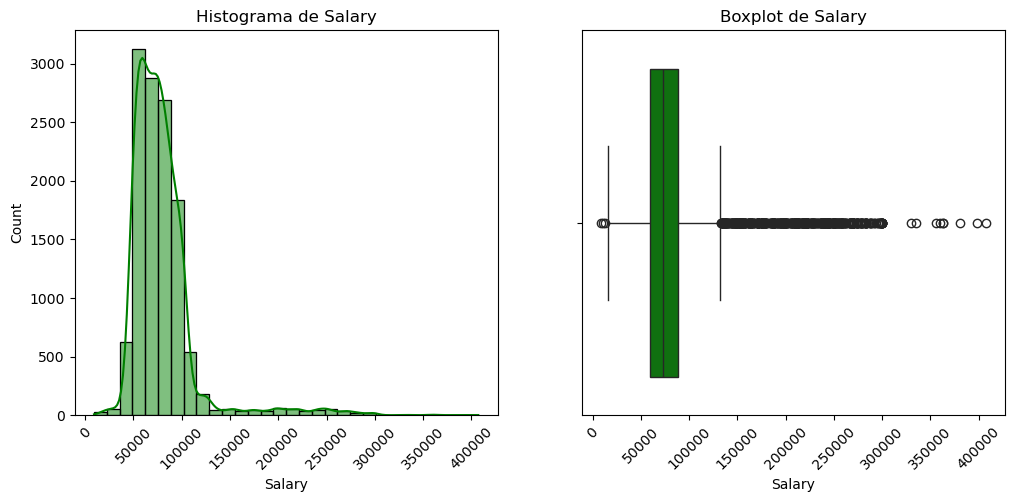

In [102]:
# Vamos a analizar visualmente los datos de salary para ver con qué imputamos el 25% de nulos de esta columna numérica.

plt.figure(figsize=(12, 5))

# Histograma 
plt.subplot(1, 2, 1)
sns.histplot(df_Loyalty_History["Salary"].dropna(), kde=True, bins=30, color="green")
plt.title("Histograma de Salary")
plt.xticks(rotation=45)

# Boxplot 
plt.subplot(1, 2, 2)
sns.boxplot(x=df_Loyalty_History["Salary"], color="green")
plt.title("Boxplot de Salary")
plt.xticks(rotation=45)

plt.show()

In [115]:
# Reemplazar valores nulos en Salary con la mediana, ya que la distribución es asimétrica
df_Loyalty_History["Salary"] = df_Loyalty_History["Salary"].fillna(df_Loyalty_History["Salary"].median())

# Verificar si aún quedan valores nulos
print(df_Loyalty_History.isnull().sum())

Loyalty Number      0
Province            0
City                0
Postal Code         0
Gender              0
Education           0
Salary              0
Marital Status      0
Loyalty Card        0
CLV                 0
Enrollment Type     0
Enrollment Year     0
Enrollment Month    0
Status              0
dtype: int64


In [116]:
print("¿Quedan valores nulos en el DataFrame CLH?", df_Loyalty_History.isnull().values.any()) # Comporbación final de nulos en el df Loyalty History

¿Quedan valores nulos en el DataFrame CLH? False


## Unión de los dos DataFrames

In [117]:
print(df_Flight_Activity.columns)
print(df_Loyalty_History.columns)

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Status'],
      dtype='object')


In [118]:
# Los dos DataFrames tienen información diferente sobre los mismos clientes (columnas distintas pero misma clave).
# Garantizamos que todos los clientes con actividad de vuelo estarán en el DF final, aunque no tengan historial de lealtad.

df_unido = df_Flight_Activity.merge(df_Loyalty_History, on="Loyalty Number", how="left")

In [119]:
def exploracion_post_union(df):

    print("Exploración del DataFrame Unido\n")
    print(f"Tamaño del DataFrame: {df.shape[0]} filas y {df.shape[1]} columnas\n")
    
    print("Información del DataFrame:")
    print(df.info(), "\n")
    
    print("Muestra de datos aleatoria:")
    print(df.sample(3), "\n")

    print("Muestra estadísticas básicas:")
    print(df_unido.describe().T)
    
    print("Valores nulos por columna:")
    print(df.isnull().sum(), "\n")
    
    print(f"Número de duplicados: {df.duplicated().sum()}\n")
    
exploracion_post_union(df_unido)

Exploración del DataFrame Unido

Tamaño del DataFrame: 405624 filas y 23 columnas

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Loyalty Number               405624 non-null  int64   
 1   Year                         405624 non-null  int64   
 2   Month                        405624 non-null  category
 3   Flights Booked               405624 non-null  int64   
 4   Flights with Companions      405624 non-null  int64   
 5   Total Flights                405624 non-null  int64   
 6   Distance                     405624 non-null  int64   
 7   Points Accumulated           405624 non-null  float64 
 8   Points Redeemed              405624 non-null  int64   
 9   Dollar Cost Points Redeemed  405624 non-null  int64   
 10  Province                     405624 non-null  object  

## Gestión de duplicados

In [121]:
print(df_unido[df_unido.duplicated()].head())  # Muestra las primeras 10 filas duplicadas

     Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
42           101902  2017  Enero               0                        0   
227          112142  2017  Enero               0                        0   
478          126100  2017  Enero               0                        0   
567          130331  2017  Enero               0                        0   
660          135421  2017  Enero               0                        0   

     Total Flights  Distance  Points Accumulated  Points Redeemed  \
42               0         0                 0.0                0   
227              0         0                 0.0                0   
478              0         0                 0.0                0   
567              0         0                 0.0                0   
660              0         0                 0.0                0   

     Dollar Cost Points Redeemed  ...  Gender Education    Salary  \
42                             0  ...  Female   Colle

In [122]:
df_unido[df_unido["Loyalty Number"] == 678205]  # Comprobación de duplicados con ID del mismo mes y año

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Status
10862,678205,2017,Enero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
10863,678205,2017,Enero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
10864,678205,2017,Enero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
27763,678205,2017,Febrero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
27764,678205,2017,Febrero,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382684,678205,2018,Noviembre,11,0,11,1177,117.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
382685,678205,2018,Noviembre,8,1,9,1341,134.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
399585,678205,2018,Diciembre,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
399586,678205,2018,Diciembre,0,0,0,0,0.0,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active


In [123]:
print(f"Número de filas antes de eliminar duplicados: {df_unido.shape[0]}")

Número de filas antes de eliminar duplicados: 405624


In [124]:
df_unido = df_unido.drop_duplicates(subset=["Loyalty Number", "Month", "Year"], keep="first")

# Consideramos duplicados cuando estas tres columnas coincidan exactamente
# Conservando la primera aparición de cada conjunto duplicado y eliminando las demás

In [128]:
print(f"Número de filas después de eliminar duplicados: {df_unido.shape[0]}")
print(f"Duplicados restantes: {df_unido.duplicated().sum()}")

Número de filas después de eliminar duplicados: 401688
Duplicados restantes: 0


In [129]:
df_unido[df_unido["Loyalty Number"] == 678205]  # Comprobación

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Status
10862,678205,2017,Enero,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
27763,678205,2017,Febrero,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
44664,678205,2017,Marzo,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
61565,678205,2017,Abril,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
78466,678205,2017,Mayo,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
95367,678205,2017,Junio,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
112268,678205,2017,Julio,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
129169,678205,2017,Agosto,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
146070,678205,2017,Septiembre,0,0,0,0,0.00,0,0,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active
150225,678205,2018,Mayo,8,3,11,2794,279.00,478,39,...,Male,Bachelor,67358.0,Married,Nova,20230.97,Standard,2015,9,Active


# FASE 2
#### Visualización

In [40]:
#  1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

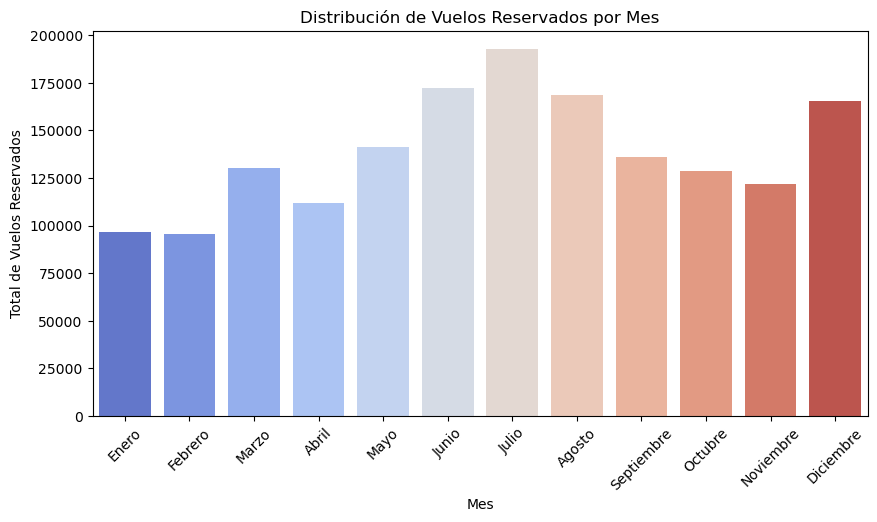

In [ ]:
# Necesitamos comparar valores numéricos (suma de Flights Booked) a lo largo de una variable categórica (Month).
# barplot es la mejor opción para visualizar cantidades agregadas (sumadas o promediadas) para diferentes categorías 

# Agrupamos y sumamos la cantidad total de vuelos reservados por mes, asegurando que se mantengan todos los meses
df_vuelos_mes = df_unido.groupby("Month", observed=False)["Flights Booked"].sum().reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(data=df_vuelos_mes, x="Month", y="Flights Booked", hue="Month", palette="coolwarm", legend=False)

plt.title("Distribución de Vuelos Reservados por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Vuelos Reservados")
plt.xticks(rotation=45)

plt.show()


# La observación es clara, las épocas en las que más se viaja es verano y navidad y después otoño y semana santa (en ese orden). Aunque la gráfica es bastante homonégena, se mantiene durante el año una media alta.

In [43]:
#  2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

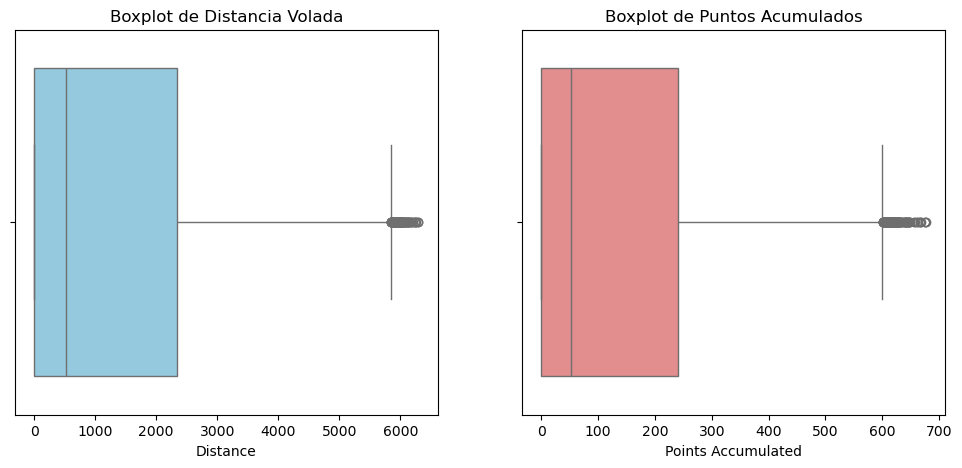

In [142]:
plt.figure(figsize=(12, 5))

# Boxplot de Distance
plt.subplot(1, 2, 1)
sns.boxplot(x=df_unido["Distance"], color="skyblue")
plt.title("Boxplot de Distancia Volada")

# Boxplot de Points Accumulated
plt.subplot(1, 2, 2)
sns.boxplot(x=df_unido["Points Accumulated"], color="lightcoral")
plt.title("Boxplot de Puntos Acumulados")

plt.show()

# A simple vista aumentan proporcionalmente, se acumula en puntos el 10%  aprox. de la distancia viajada

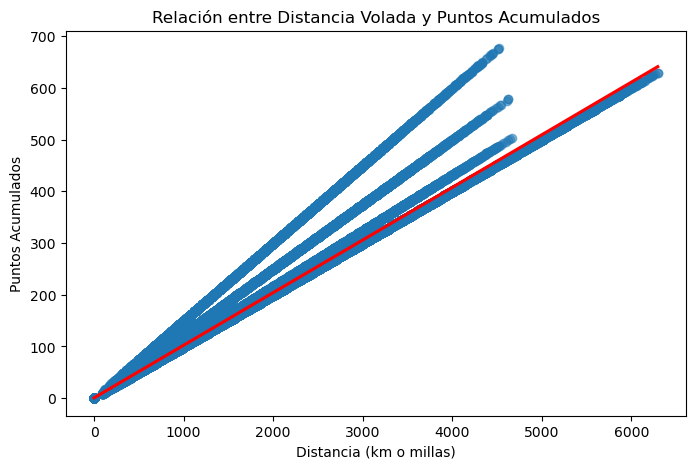

In [143]:
# Vamos a comprobarlo con una visualización regplot

plt.figure(figsize=(8, 5))

sns.regplot(data=df_unido, x="Distance", y="Points Accumulated", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title("Relación entre Distancia Volada y Puntos Acumulados")
plt.xlabel("Distancia (km o millas)")
plt.ylabel("Puntos Acumulados")

plt.show()

# Vemos una linealidad fuerte pero también vemos que se acumulan más puntos que kms por otro lado. Hay otra variable que está interfiriendo en los puntos acumulados por kms viajados.

In [ ]:
# queremos comprobar esta sospecha de que las tarjetas acumulan puntos de forma diferente.

# Evitamos divisiones por 0. Si Distance = 0, reemplazamos con NaN para evitar problemas.
df_unido["Ratio Puntos/Distancia"] = df_unido["Points Accumulated"] / df_unido["Distance"].replace(0, np.nan)

df_tarjeta_resumen = df_unido.groupby("Loyalty Card").agg(
    Total_Km_Volados=("Distance", "sum"),
    Total_Puntos_Acumulados=("Points Accumulated", "sum"),
    Promedio_Puntos_por_Km=("Ratio Puntos/Distancia", "mean")
).reset_index()

print(df_tarjeta_resumen)


  Loyalty Card  Total_Km_Volados  Total_Puntos_Acumulados  \
0       Aurora         100166088               10550164.5   
1         Nova         164346025               16859774.5   
2         Star         223048395               22467445.0   

   Promedio_Puntos_por_Km  
0                0.106180  
1                0.102961  
2                0.100803  


In [ ]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

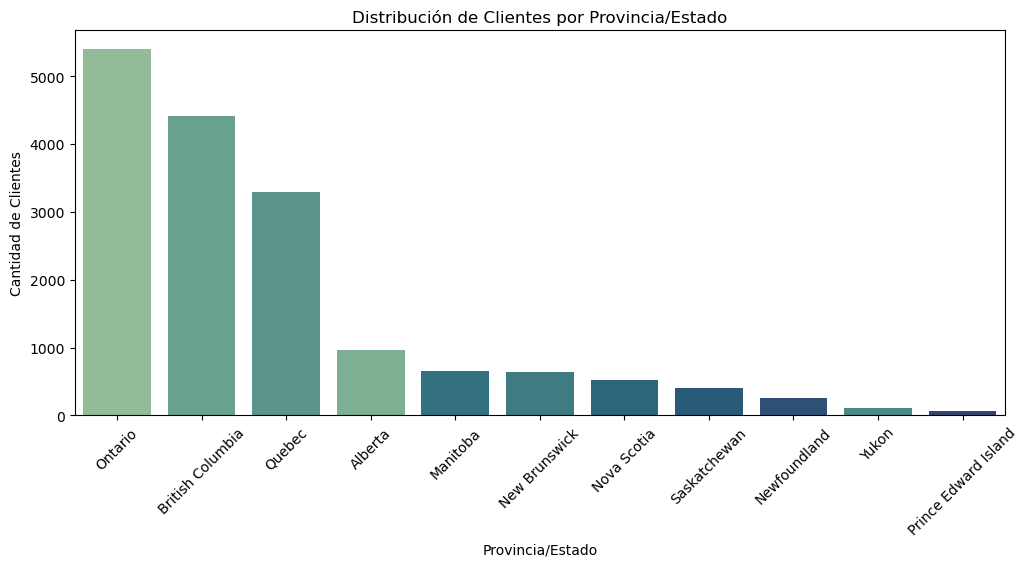

In [ ]:
plt.figure(figsize=(12, 5))

# Gráfico de countplot corregido para evitar el warning
sns.countplot(data=df_Loyalty_History, x="Province", order=df_Loyalty_History["Province"].value_counts().index, 
              hue="Province", palette="crest", legend=False)

plt.title("Distribución de Clientes por Provincia/Estado")
plt.xlabel("Provincia/Estado")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)  

plt.show()

# Hay una gran diferencia con tres ciudades, que son con diferencia las más pobladas de Canadá.

In [ ]:
#  4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

/var/folders/6l/4j9v9mjs5r52js7vv5l9djp40000gn/T/ipykernel_1351/1957447981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_educacion_vuelos, x="Education", y="Loyalty Number", palette="Blues", legend=False)


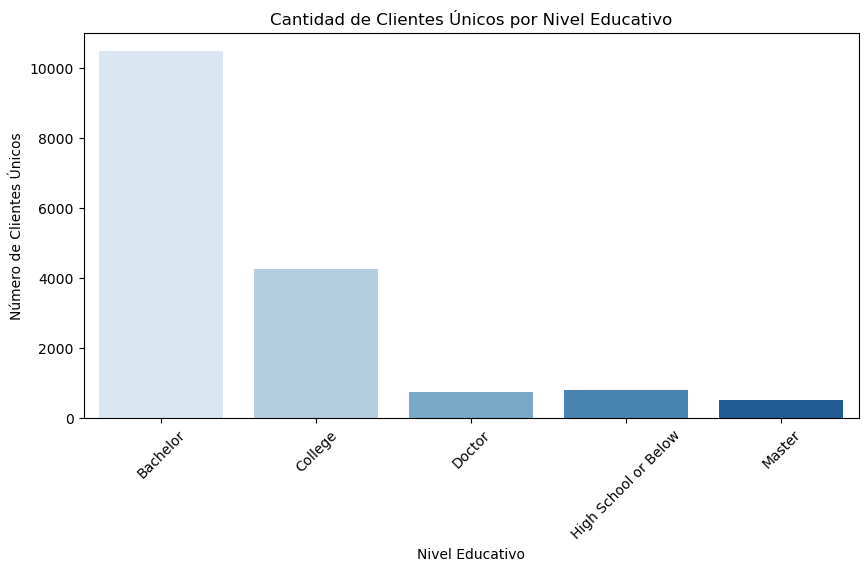

In [152]:
# Agrupamos valores único de loyalty number para no alterar resultados.

df_educacion_vuelos = df_unido.groupby("Education")["Loyalty Number"].nunique().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_educacion_vuelos, x="Education", y="Loyalty Number", palette="Blues", legend=False)

plt.title("Cantidad de Clientes Únicos por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Número de Clientes Únicos")
plt.xticks(rotation=45)
plt.show()


# La relación es lógica a mayor nivel educativo mayor salario, siendo cero el nivel estudiante.

In [236]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

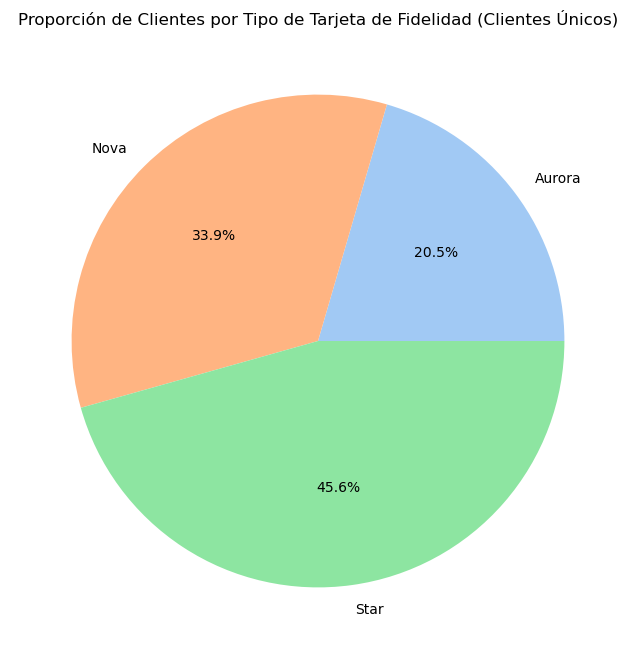

In [153]:
df_tarjetas = df_unido.groupby("Loyalty Card")["Loyalty Number"].nunique()

plt.figure(figsize=(8, 8))
plt.pie(df_tarjetas, labels=df_tarjetas.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad (Clientes Únicos)")
plt.show()


# conclusión hay muchos que inician con tarjeta star pero quizás luego no continúan.

In [154]:
df_comparacion = df_unido.groupby("Loyalty Card").agg(
    Total_Km_Volados=("Distance", "sum"),
    Total_Puntos_Acumulados=("Points Accumulated", "sum"),
    Año_Inscripción_Promedio=("Enrollment Year", "mean"),
    Clientes_Totales=("Loyalty Number", "nunique")
).reset_index()

df_comparacion

# Se comprueba que esta tarjeta es la que más puntos acumula porque son clientes de hace más tiempo.

,Loyalty Card,Total_Km_Volados,Total_Puntos_Acumulados,Año_Inscripción_Promedio,Clientes_Totales
0,Aurora,100166088,10550164.5,2015.239428,3429
1,Nova,164346025,16859774.5,2015.265738,5671
2,Star,223048395,22467445.0,2015.250098,7637


In [ ]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

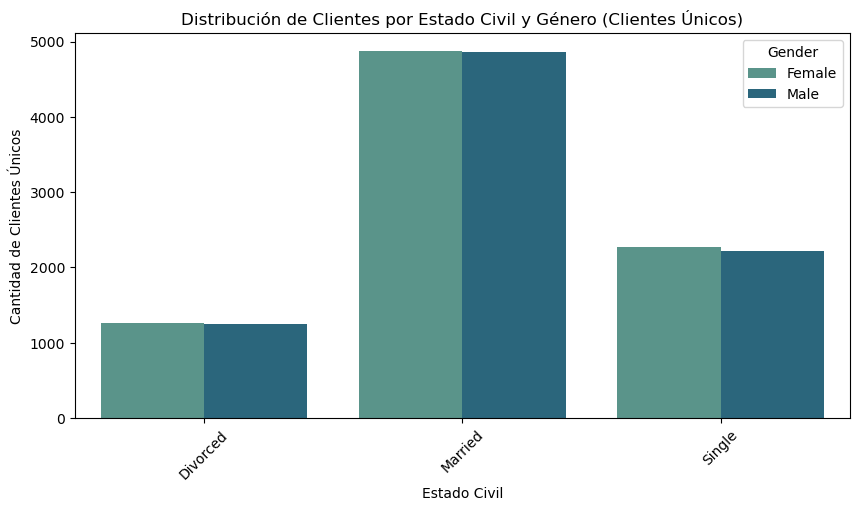

In [148]:
# usamos datos unicos de loyalty number para no alterar resultados.

df_estado_genero = df_unido.groupby(["Marital Status", "Gender"])["Loyalty Number"].nunique().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_estado_genero, x="Marital Status", y="Loyalty Number", hue="Gender", palette="crest")

plt.title("Distribución de Clientes por Estado Civil y Género (Clientes Únicos)")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de Clientes Únicos")
plt.xticks(rotation=45)
plt.show()


# se observa claramente que hay un alto porcentaje de casados que viajan.
# por otro lado no hay mucha diferencia entre hombres y mujeres pues la base de datos está equilibrada en est sentido.

## FASE 3

##### BONUS

In [ ]:
# Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
# significativas en el número de vuelos reservados según el nivel educativo de los clientes. 
# Para ello, los pasos que deberas seguir son:

# 1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
# 'Flights Booked' y 'Education'.

In [62]:
# Ver cuántos niveles educativos hay en el dataset df_unido
num_niveles_educacion = df_unido["Education"].nunique()
niveles_educacion = df_unido["Education"].unique()

# Mostrar los resultados
print("Número de niveles educativos:", num_niveles_educacion)
print("Niveles educativos disponibles:", niveles_educacion)


Número de niveles educativos: 5
Niveles educativos disponibles: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


In [63]:
import scipy.stats as stats

# Crear listas con los vuelos reservados según cada nivel educativo
grupos_educacion = [df_unido[df_unido["Education"] == nivel]["Flights Booked"] for nivel in df_unido["Education"].unique()]

# Aplicar ANOVA de una vía
anova_resultado = stats.f_oneway(*grupos_educacion)

# Mostrar el resultado
print("Estadístico F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

# hay diferencias significativas en el número de vuelos reservados según el nivel educativo.

Estadístico F: 3.7273618814419534
Valor p: 0.004893278098561247


In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplicar la prueba de Tukey
tukey = pairwise_tukeyhsd(df_unido["Flights Booked"], df_unido["Education"])

# Mostrar resultados
print(tukey)


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2        meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
            Bachelor              College     0.06 0.0174  0.0069  0.113   True
            Bachelor               Doctor   0.0654 0.4957 -0.0459 0.1767  False
            Bachelor High School or Below    0.069 0.4087 -0.0391  0.177  False
            Bachelor               Master   0.0964 0.2729  -0.036 0.2288  False
             College               Doctor   0.0054 0.9999 -0.1111 0.1219  False
             College High School or Below    0.009 0.9995 -0.1045 0.1224  False
             College               Master   0.0364 0.9507 -0.1004 0.1732  False
              Doctor High School or Below   0.0036    1.0 -0.1462 0.1534  False
              Doctor               Master    0.031 0.9871 -0.1372 0.1992  False
High School or Below               Maste

In [ ]:
# Conclusión:

# "Bachelor" vs "College" → p = 0.0174 (menor que 0.05) → Rechazamos la hipótesis nula, lo que significa que estos dos niveles educativos tienen diferencias significativas en la cantidad de vuelos reservados.
# El resto de los pares NO tienen diferencias significativas (p > 0.05), lo que significa que no hay evidencia de que los otros niveles educativos reserven más vuelos que los demás.

/var/folders/6l/4j9v9mjs5r52js7vv5l9djp40000gn/T/ipykernel_1351/3125763161.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_unido, x="Education", y="Flights Booked", estimator=np.mean, palette="Blues")


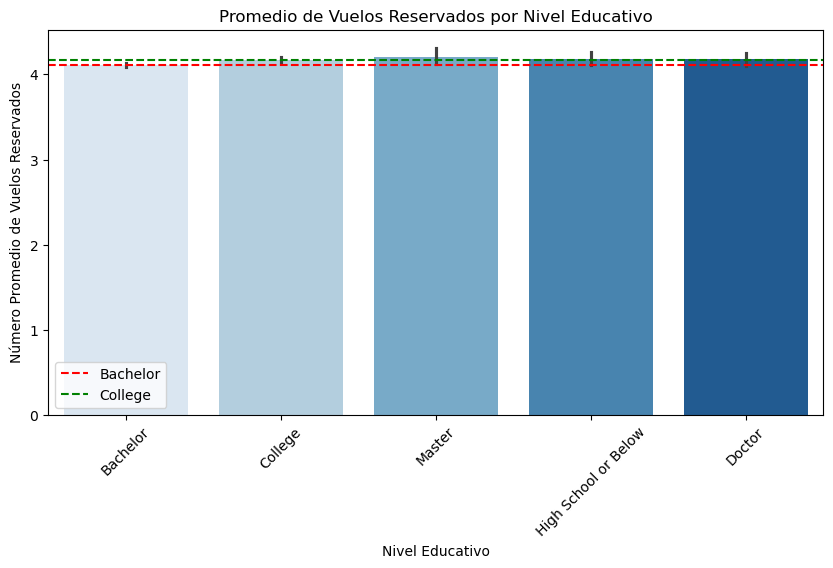

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 5))

# Gráfico de barras con los promedios de vuelos reservados por nivel educativo
sns.barplot(data=df_unido, x="Education", y="Flights Booked", estimator=np.mean, palette="Blues")

plt.title("Promedio de Vuelos Reservados por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Número Promedio de Vuelos Reservados")
plt.xticks(rotation=45)

# Agregar líneas para destacar diferencias significativas encontradas en la prueba de Tukey
plt.axhline(y=df_unido[df_unido["Education"] == "Bachelor"]["Flights Booked"].mean(), color='red', linestyle='dashed', label="Bachelor")
plt.axhline(y=df_unido[df_unido["Education"] == "College"]["Flights Booked"].mean(), color='green', linestyle='dashed', label="College")

plt.legend()
plt.show()


In [ ]:
#  2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
# básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

In [68]:
df_analisis_educacion = df_unido.groupby("Education")["Flights Booked"].agg(
    Media="mean",
    Desviacion_Estandar="std",
    Mediana="median",
    Minimo="min",
    Maximo="max"
).reset_index()

# Mostrar los resultados
df_analisis_educacion

,Education,Media,Desviacion_Estandar,Mediana,Minimo,Maximo
0,Bachelor,4.112363,5.224957,1.0,0,21
1,College,4.172349,5.250673,1.0,0,21
2,Doctor,4.177736,5.262027,1.0,0,21
3,High School or Below,4.181319,5.248480,1.0,0,21
4,Master,4.208743,5.224245,1.0,0,21


In [69]:
# 3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
# significativa en el número de vuelos reservados entre los diferentes niveles educativos

In [71]:
from scipy.stats import ttest_ind

# Comparar "Bachelor" vs "College"
group1 = df_unido[df_unido["Education"] == "Bachelor"]["Flights Booked"]
group2 = df_unido[df_unido["Education"] == "College"]["Flights Booked"]

stat, p_value = ttest_ind(group1, group2)

print(f"Comparación Bachelor vs College - Estadístico t: {stat}, p-valor: {p_value}")


Comparación Bachelor vs College - Estadístico t: -3.0850895396020244, p-valor: 0.002035066005335321


In [72]:
niveles = df_unido["Education"].unique()

for i in range(len(niveles)):
    for j in range(i + 1, len(niveles)):
        group1 = df_unido[df_unido["Education"] == niveles[i]]["Flights Booked"]
        group2 = df_unido[df_unido["Education"] == niveles[j]]["Flights Booked"]
        
        stat, p_value = ttest_ind(group1, group2)
        print(f"Comparación {niveles[i]} vs {niveles[j]} - Estadístico t: {stat}, p-valor: {p_value}")


Comparación Bachelor vs College - Estadístico t: -3.0850895396020244, p-valor: 0.002035066005335321
Comparación Bachelor vs Master - Estadístico t: -1.9891337397109015, p-valor: 0.046687474994784
Comparación Bachelor vs High School or Below - Estadístico t: -1.7435367399071533, p-valor: 0.0812410399447855
Comparación Bachelor vs Doctor - Estadístico t: -1.6045863717782043, p-valor: 0.10858603644448572
Comparación College vs Master - Estadístico t: -0.7236075328311663, p-valor: 0.4693082014870429
Comparación College vs High School or Below - Estadístico t: -0.21504922951063787, p-valor: 0.8297293007320143
Comparación College vs Doctor - Estadístico t: -0.12567337545187637, p-valor: 0.899990689773531
Comparación Master vs High School or Below - Estadístico t: 0.45002357927314396, p-valor: 0.6526965897950976
Comparación Master vs Doctor - Estadístico t: 0.5016606051158711, p-valor: 0.6159099856208702
Comparación High School or Below vs Doctor - Estadístico t: 0.06499683456630014, p-valor:

In [ ]:
#  Conclusión: Solo hay diferencias significativas en dos comparaciones:
# Bachelor vs College → p = 0.0020 ✅
# Bachelor vs Master → p = 0.0467 ✅

# En los demás casos (p > 0.05), NO hay diferencias significativas en vuelos reservados entre los niveles educativos.

/var/folders/6l/4j9v9mjs5r52js7vv5l9djp40000gn/T/ipykernel_1351/2646606178.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ttest, x="Comparación", y="p-valor", palette="Blues")


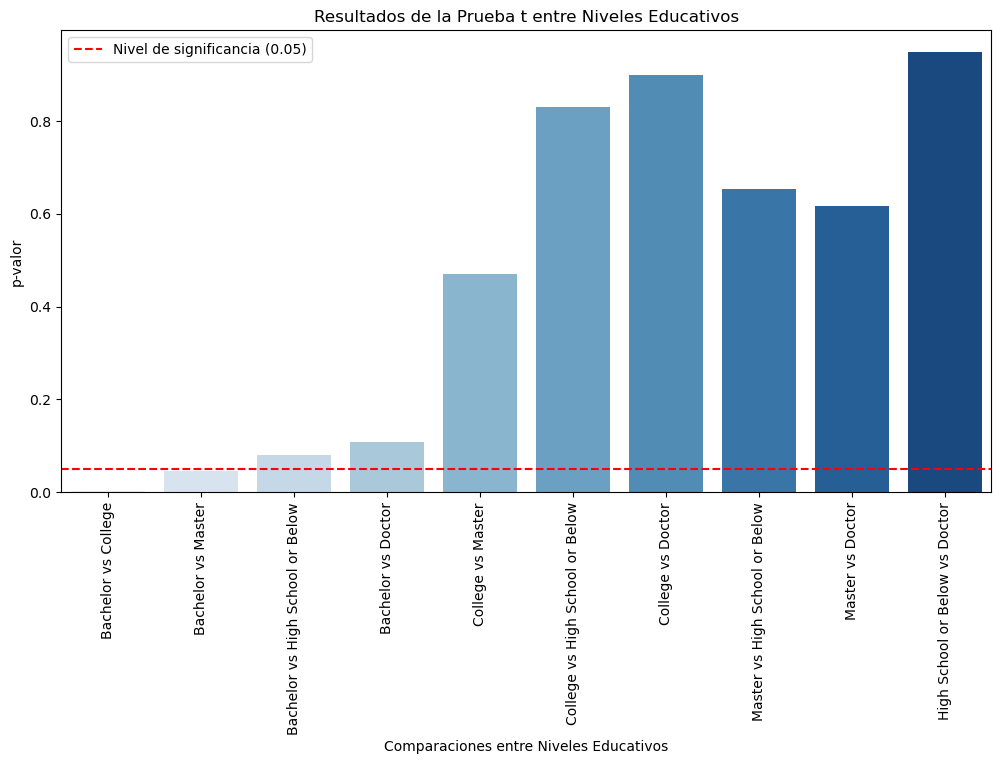

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los resultados de la prueba t
comparaciones = [
    ("Bachelor vs College", -3.08, 0.0020),
    ("Bachelor vs Master", -1.98, 0.0467),
    ("Bachelor vs High School or Below", -1.74, 0.0812),
    ("Bachelor vs Doctor", -1.60, 0.1086),
    ("College vs Master", -0.72, 0.4693),
    ("College vs High School or Below", -0.21, 0.8297),
    ("College vs Doctor", -0.12, 0.8999),
    ("Master vs High School or Below", 0.45, 0.6527),
    ("Master vs Doctor", 0.50, 0.6159),
    ("High School or Below vs Doctor", 0.06, 0.9482),
]

df_ttest = pd.DataFrame(comparaciones, columns=["Comparación", "Estadístico t", "p-valor"])

# Crear gráfico de barras del p-valor por comparación
plt.figure(figsize=(12, 6))
sns.barplot(data=df_ttest, x="Comparación", y="p-valor", palette="Blues")

# Línea de referencia para significancia estadística (p=0.05)
plt.axhline(y=0.05, color="red", linestyle="dashed", label="Nivel de significancia (0.05)")

plt.title("Resultados de la Prueba t entre Niveles Educativos")
plt.xlabel("Comparaciones entre Niveles Educativos")
plt.ylabel("p-valor")
plt.xticks(rotation=90)
plt.legend()
plt.show()
